In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
%run 'Power-Client pre analysis clustering.ipynb'

In [7]:
def test_measure(measure, subset, globalA, cluster_results):
    mea = globalA.columns[measure]
    min = subset.iloc[:, measure].min()
    max = subset.iloc[:, measure].max()
    # print('{}, minimum value: {}, maximum value: {}\n'.format(
    #     mea,
    #     min,
    #     max
    #     ))
    cluster_results = cluster_results.append({'measure name' : mea,
                                              'min' : min,
                                              'max' : max}, ignore_index=True)
    return  cluster_results

def density(globalA):
    for cluster in range(5):
        cluster_results = pd.DataFrame(columns=['measure name', 'min', 'max'])
        # print('Cluster: {}'.format(cluster))
        subset = globalA[globalA.cluster==cluster]
        for measure in range(6):
            cluster_results = test_measure(measure, subset, globalA, cluster_results)

        cluster_results.columns.rename(f'Cluster: {cluster}', inplace=True)
        cluster_results.set_index('measure name', inplace=True)
        print(cluster_results)
        cluster_results_styler = cluster_results.style
        df_to_png(cluster_results_styler, f'cluster{cluster}_measures_{country}.png')


    for measure in range(6):
        for cluster in range(5):
            # Subset to the airline
            # print(cluster)
            # print(globalA)
            # print(globalA[globalA['cluster']==cluster].index.values)
            subset = globalA[globalA.cluster==cluster]
            measure_name = globalA.iloc[:, measure].name

            # Draw the density plot
            data = subset.iloc[:, measure]
            g = sns.distplot(data, hist = False,
                         kde_kws = {'linewidth': 3},
                         label = data.index.values)
        plt.title(f'Density Plot of {measure_name} for clusters - {country}')
        plt.ylabel('Density')
        g.figure.set_size_inches(20,8)
        plt.savefig(f'density_{measure_name}_{country}.png', bbox_inches='tight')

        plt.show()

In [8]:
big_data_selected['cluster'] = cl_results[0]['scaled n=5']
big_data_selected

event_filtr,Consult- not specified below_nummen>=5,Engage in negotiation_nummen>=5,Make statement- not specified below_none,Praise or endorse_nummen>=10,Return release- not specified below_goldstein>=3,Use conventional military force- not specified below_nummen>=5,cluster
Relation,,,,,,,
POL-BLR,10.165975,3.803596,6.164572,7.045010,1.925157,1.221761,2
POL-CZE,10.848526,6.279541,4.775943,6.573859,1.152344,2.768400,4
POL-DEU,7.338507,3.530500,5.854999,5.191296,2.568056,6.608767,3
POL-ESP,4.886364,3.371212,5.461961,8.404009,1.166966,5.416667,0
POL-HUN,10.703323,5.471774,4.308724,7.817172,1.860626,3.229681,1
POL-ITA,6.387622,3.392184,5.695500,8.389395,1.545916,3.689744,0
POL-LTU,11.556921,6.047226,4.573958,8.703939,1.423209,2.687656,1
POL-RUS,4.956315,2.415751,7.316060,5.883710,3.641294,3.985989,3
POL-SVK,12.711214,6.298003,3.863946,4.901961,1.145038,2.419355,4


Cluster: 0                                               min       max
measure name                                                          
Consult- not specified below_nummen>=5              4.886364  8.104772
Engage in negotiation_nummen>=5                     3.371212  3.939248
Make statement- not specified below_none            5.461961  5.894466
Praise or endorse_nummen>=10                        8.265631  8.404009
Return release- not specified below_goldstein>=3    1.166966  2.668361
Use conventional military force- not specified ...  3.689744  5.416667
Cluster: 1                                                min        max
measure name                                                            
Consult- not specified below_nummen>=5              10.703323  11.556921
Engage in negotiation_nummen>=5                      5.471774   6.047226
Make statement- not specified below_none             4.308724   4.573958
Praise or endorse_nummen>=10                         7.817172   8.7

/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

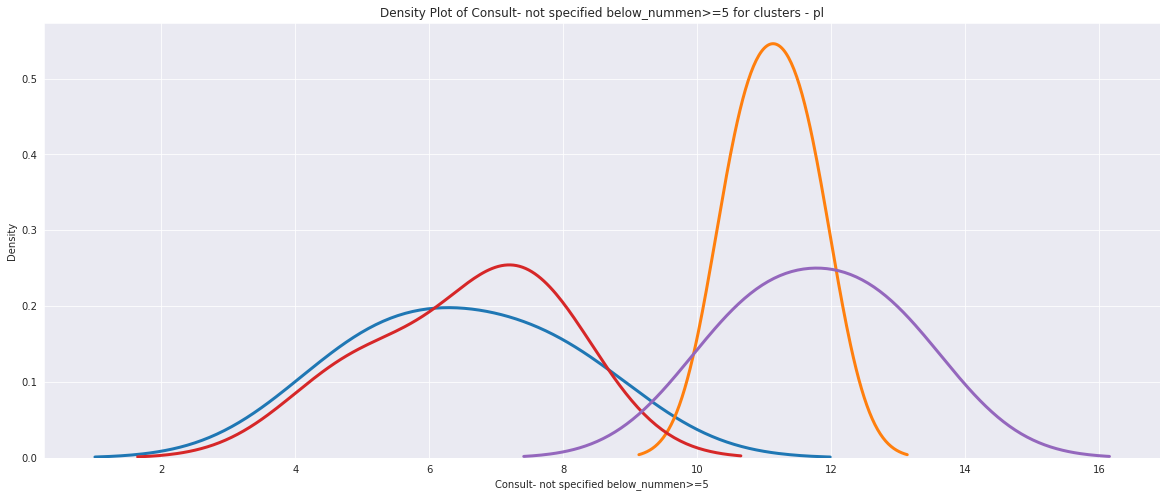

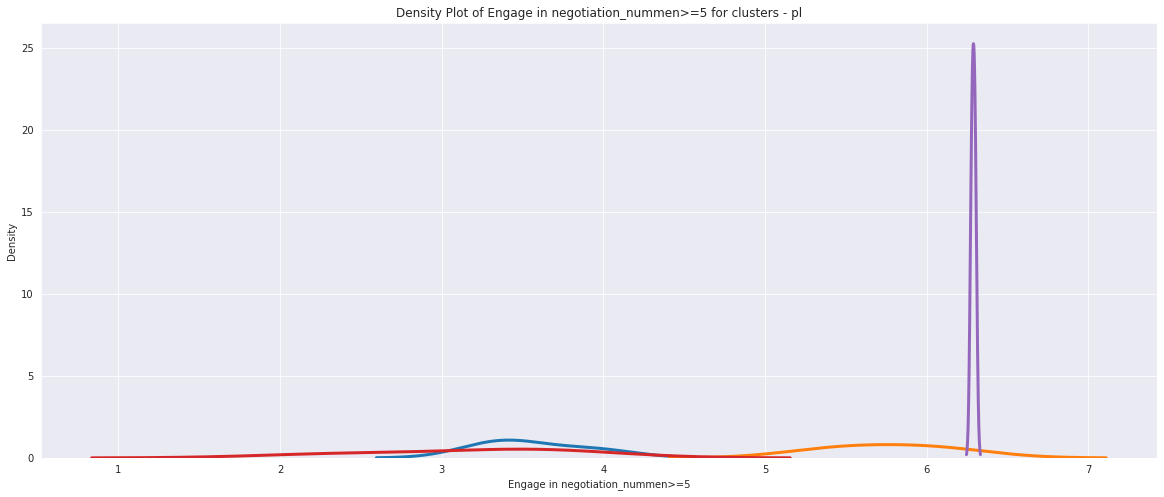

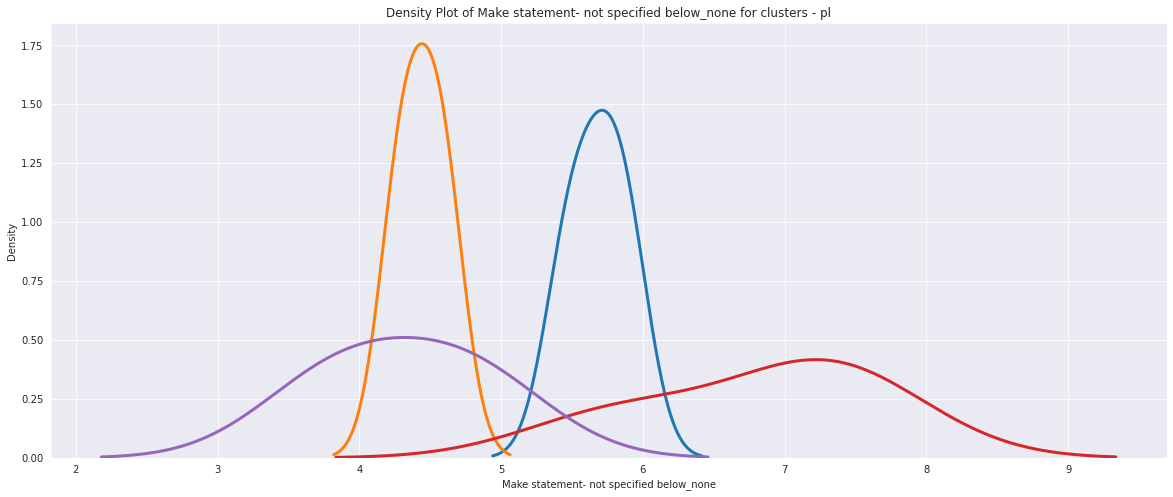

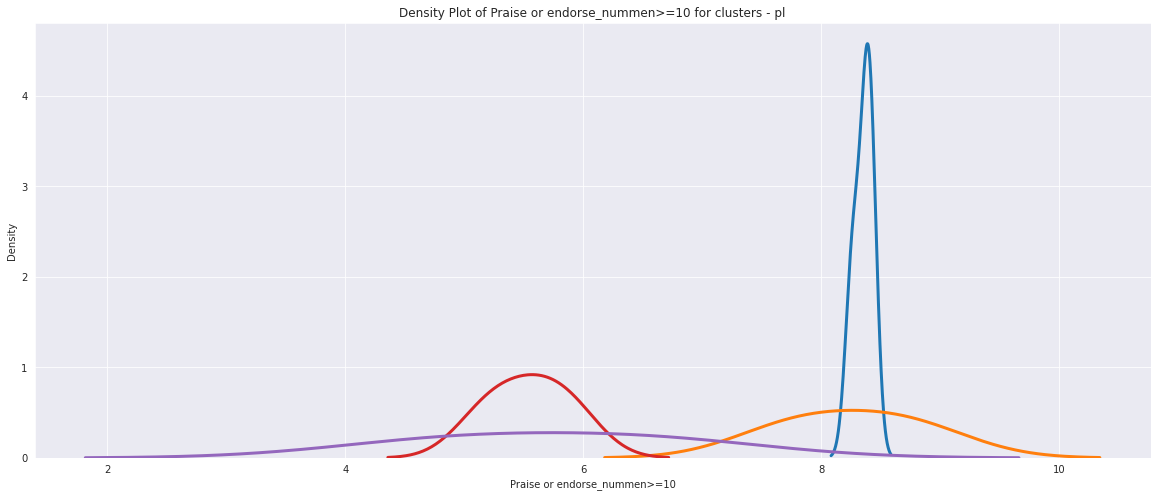

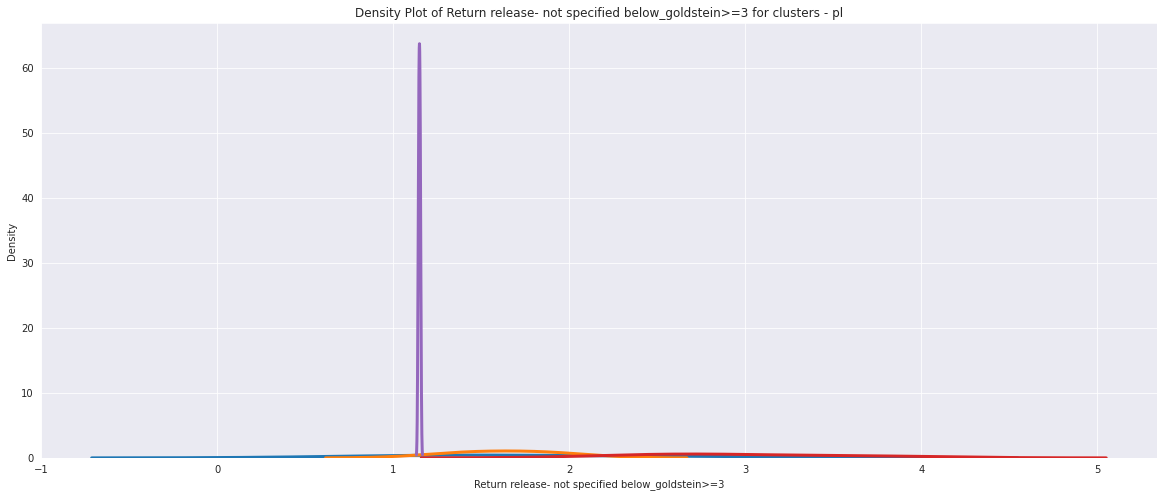

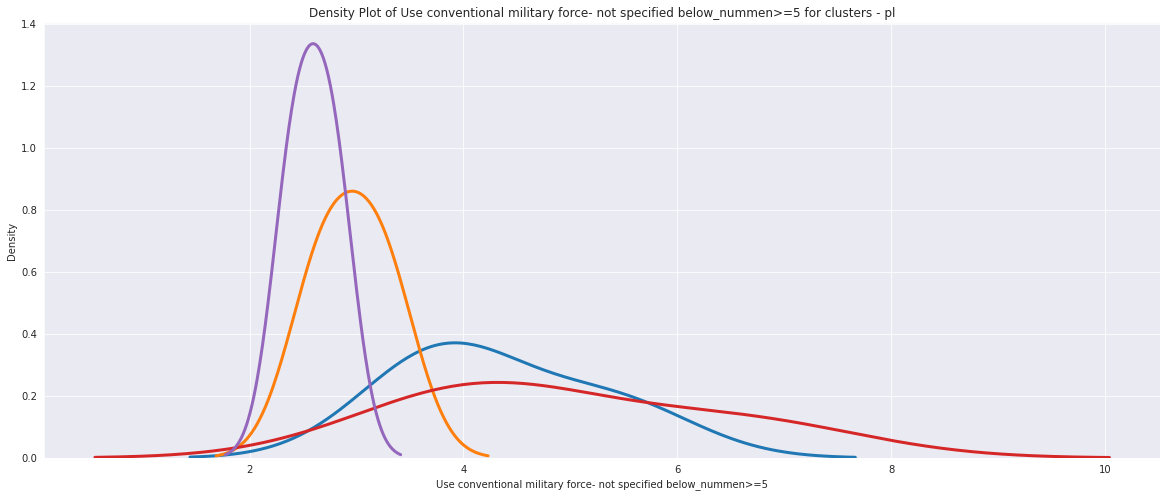

In [9]:
density(big_data_selected)
